# Browian Dynamics 
(BOAP algorithm: *BJ Leimkuhler and C Matthews Appl. Math. Res. eXpress 2013, 34–56 (2013); J. Chem. Phys. 138, 174102 (2013)*)



\begin{equation}
\bold{\dot{p}} = -\gamma\bold{p} + \sigma \bold{\dot{w}} 
\end{equation}
where:
<br>
1. $\gamma\bold{p}$ is the friction force. It simulates the effect of the bath (solvent) on the system.
<br>
2. $\sigma\bold{\dot{w}}$ is the random force, which is represented by the derivate of a Wiener process $\bold{w}$.
<br>
3. $\sigma = \sqrt{2 \gamma m k_B T}$ governs the strenght of the random force (it is related to the friction coefficient via the fluctuation-dissipation theorem)
<br>
\begin{equation}
d\bold{p} = -\gamma\bold{p} dt + \sigma d\bold{w}
\end{equation}

<br>

\begin{equation}
\bold{p\left(t + \delta t\right)} = \exp(-\gamma\delta t) \bold{p\left(t\right)} + \sqrt{1-\exp(-2\gamma\delta t)}\sqrt{m k_B T} \bold{G}
\end{equation}


In [344]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import simulation as sim
import importlib
importlib.reload(sim)

<module 'simulation' from 'c:\\Users\\gian.pio.domiziani\\develop\\develop\\brownian_dynamics\\simulation.py'>

In [345]:
# Set default values, check keys and typecheck values
DT = 0.005
NSTEPS = 1000
T = [1.0, 2.0, 2.5]
GAMMA = [0.02, 0.4, 0.8]
N = 1
r = 0.0
p = np.sqrt(3 * 10**2)
BOX = 1.0
F = [0.0, 0.5, 1.0]

In [346]:
# for i, g in enumerate(GAMMA):
#     for temp in T:
#         for f in F:
#             rs, _ = sim.main(DT, r, p, g, BOX, temp, N, NSTEPS, f, random=True)
#             xs = [x[0][0] for x in rs]
#             ys = [x[0][1] for x in rs]
#             zs = [x[0][2] for x in rs]
    
#             fig_xs = plt.figure()
#             ax1 = fig_xs.add_subplot(projection='3d')
#             fig_xs.suptitle(f'3D R(t) - gamma={g}, T={temp}, F={f}')
#             _ = ax1.plot(xs, ys, zs, lw=1.5)
#             ax1.set_xlabel('X')
#             ax1.set_ylabel('Y')
#             ax1.set_zlabel('Z')

#         # fig_pxs = plt.figure()
#         # ax2 = fig_pxs.add_subplot()
#         # fig_pxs.suptitle(f'gamma={g}, T={temp}')
#         # xs, pxs = np.asarray(xs), np.asarray(pxs)
#         # _ = ax2.scatter(xs, pxs, c=[np.linspace(-xs.max(), xs.max(), NSTEPS)])
#         # ax2.set_xlabel('x')
#         # ax2.set_ylabel('px')
#         # plt.show()

In [362]:
np.random.seed(123456789)
NSTEPS = 10000
T = [1.2, 2.4]
F = 0.0
N = 1
GAMMA = [0.05, 0.1]
r, p = 0.0, [17.32, 25.98]

DATA = {'RS': {
    'gamma': [], 
    'T': [], 
    'mean': [], 
    'mean_square': []
    }, 
    'PS': {
            'p0': [],
            'gamma': [], 
            'T': [], 
            'mean': [], 
            'mean_square': []
            }
    } 

for g in GAMMA:
    for temp in T:
        for o in p:
            rs, ps = sim.main(DT, r, o, g, BOX, temp, N, NSTEPS, F, random=True)
            R = np.asarray([r[0] for r in rs])
            P = np.asarray([p[0] for p in ps])
    
            r_mean = np.mean(R, axis=1) 
            r_mean_square = np.mean(np.square(R), axis=1)
            p_mean = np.mean(P, axis=1) # <v(t)> = 1/N sum(px(t) + py(t) + pz(t)) 
            p_mean_square = np.mean(np.square(P), axis=1) # <v^2(t)> = 1/N sum(px(t)**2 + py(t)**2 + pz(t)**2)
    
            DATA['RS']['mean'].append(r_mean)
            DATA['RS']['mean_square'].append(r_mean_square)
            DATA['PS']['mean'].append(p_mean)
            DATA['PS']['mean_square'].append(p_mean_square)

            DATA['RS']['gamma'].append(g)
            DATA['RS']['T'].append(temp)
            DATA['PS']['gamma'].append(g)
            DATA['PS']['T'].append(temp)
            DATA['PS']['p0'].append(o)

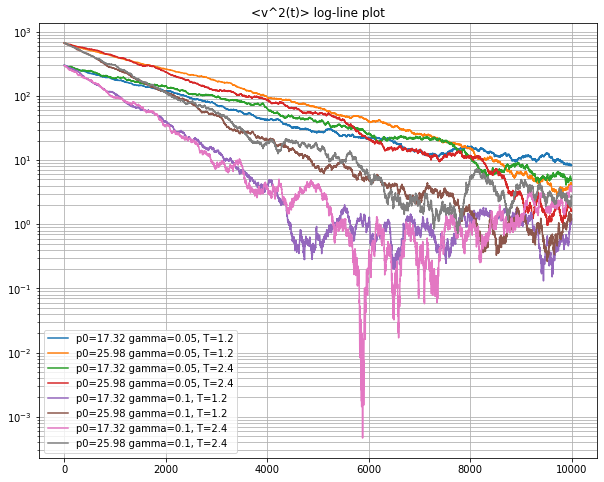

In [363]:
plt.figure(figsize=[10,8])
for i in range(len(DATA['PS']['mean_square'])):
    plt.title('<v^2(t)> log-line plot')
    plt.plot(range(NSTEPS), DATA['PS']['mean_square'][i], label=f'p0={DATA["PS"]["p0"][i]} gamma={DATA["PS"]["gamma"][i]}, T={DATA["PS"]["T"][i]}')
    plt.yscale('log')
    plt.legend()
    plt.grid(True, which='both')
plt.show()

### $\left<v^2(t)\right>$ plot:
The quantity follows an exponential decay (showing a line if log scale) for low times, while it reaches the mean constant value of $\sim \sigma^2 / \gamma$ for the equilibrium state (m=1). 